In [1]:
import tkinter
import numpy as np 
import pandas as pd
from numpy import exp,log,sin,cos
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
import os
def extractGdpKey(dataTmp):
    key=dataTmp['Category'][0]
    if len(key.split())>2:
        key=key.split()[2]
    key=key.split()[0]
    return key
    
def loadGDPFiles(Path):
    dataGdp={}
    for fname in os.listdir(Path):  
        fid=open(Path+fname)
        dataTmp=pd.DataFrame(json.load(fid))
        key=extractGdpKey(dataTmp)
        #print(key)
        dataGdp[key]=dataTmp.set_index('DateTime')
    return dataGdp

def loadGDPFilesCSV(Path):
    dataGdp={}
    for fname in os.listdir(Path):  
        #print(Path+fname)
        dataTmp=pd.read_csv(Path+fname,error_bad_lines=False)
        key=extractGdpKey(dataTmp)
        dataGdp[key]=dataTmp.(DateTime=pd.to_datetime(dataTmp.DateTime), infer_datetime_format=True)
        dataGdp[key]=dataTmp.set_index('DateTime')
    return dataGdp

def mergeGdpFiles(dataGdp):
    dataGdpMerged= dataGdp['GDP'].drop(
                        columns=['Category','LastUpdate','HistoricalDataSymbol','Frequency','Country']
                        ).rename(columns={'Value':'GDP'})
    dataTmp=dataGdp['capita'].drop(
                        columns=['Category','LastUpdate','HistoricalDataSymbol','Frequency','Country']
                        ).rename(columns={'Value':'GDPpc'})
    dataGdpMerged=dataGdpMerged.merge(dataTmp,left_on='DateTime',right_on='DateTime')
    dataTmp=dataGdp['Prices'].drop(
                        columns=['Category','LastUpdate','HistoricalDataSymbol','Frequency','Country']
                        ).rename(columns={'Value':'GDPpr'})
    dataGdpMerged=dataGdpMerged.merge(dataTmp,left_on='DateTime',right_on='DateTime',how='right')
    dataGdp.pop('GDP')
    dataGdp.pop('capita')
    dataGdp.pop('Prices')
    for key in dataGdp.keys():
         dataTmp=dataGdp[key].drop(
                        columns=['Category','LastUpdate','HistoricalDataSymbol','Frequency','Country']
                        ).rename(columns={'Value':key[0:4]})
         dataGdpMerged=dataGdpMerged.merge(dataTmp,left_on='DateTime',right_on='DateTime')
         #print(key[0:4])
    return dataGdpMerged

dataGdp=loadGDPFiles('DataMexico/')
dataGdp.keys()
dataGdpMerged=mergeGdpFiles(dataGdp)
dataGdpMerged

dataGdpNZ=loadGDPFiles('DataNewZealand/')
dataGdpMergedNZ=mergeGdpFiles(dataGdpNZ)


dataGdpSW=loadGDPFilesCSV('DataSweden/')
dataGdpMergedSW=mergeGdpFiles(dataGdpSW)


C:\Users\Andre\AppData\Local\Temp/ipykernel_7452/2338593871.py:62: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  dataGdpSW=loadGDPFilesCSV('DataSweden/')
b'Skipping line 166: expected 7 fields, saw 11\n'
b'Skipping line 166: expected 7 fields, saw 11\n'
b'Skipping line 63: expected 7 fields, saw 11\n'


In [39]:
dataGdpMergedSW

,GDP,GDPpc,GDPpr,Agri,Cons,Manu,Mini,Publ,Serv,Tran,Util
DateTime,,,,,,,,,,,
1981-03-31T00:00:00,NaN,NaN,545897,10733,43075,59527,12048,193922,189754,27541,16108
1981-06-30T00:00:00,NaN,NaN,549396,11087,43505,61068,10731,194642,189805,26949,16197
1981-09-30T00:00:00,NaN,NaN,556211,10972,44083,62463,9587,195349,191743,26843,17707
1981-12-31T00:00:00,129.69,28750.8,554265,10686,44403,63081,9128,195908,191150,26571,16727
1982-03-31T00:00:00,NaN,NaN,557613,11474,45250,61898,8075,196674,193799,27004,15719
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31T00:00:00,541.06,51620.7,1264354,17044,73138,160675,8315,232481,585040,41258,29216
2021-03-31T00:00:00,NaN,NaN,1279743,17051,73011,162187,8149,235533,596631,42622,30034
2021-06-30T00:00:00,NaN,NaN,1292021,17330,74335,161356,8009,236554,604470,43151,29577


In [4]:
#df1=dataGdp['GDP'].drop(columns=['Category','LastUpdate','HistoricalDataSymbol','Frequency'])[0:-1]
#df1=df1.set_index('DateTime')
#df1=df1.rename(columns=dict(Value='GDP'))

#df2=dataGdp['Agriculture'].drop(columns=['Category','LastUpdate','HistoricalDataSymbol','Frequency','Country'])[0:-1]
#df2=df2.set_index('DateTime').rename(columns=dict(Value="AgroVal"))
#df2.merge(df1,right_on='DateTime',left_on='DateTime',how='inner')


In [5]:
#df1=dataGdp['GDP'].drop(columns=['Category','LastUpdate','HistoricalDataSymbol','Frequency'])[0:61]
#df1=df1.set_index('DateTime')
#df1=df1.rename(columns=dict(Value='GDP'))

#df2=dataGdp['Agriculture'].drop(columns=['Category','LastUpdate','HistoricalDataSymbol','Frequency','Country'])[0:116]
#df2=df2.set_index('DateTime').rename(columns=dict(Value="AgroVal"))
#pd.concat([df1,df2],axis=1,join='inner')

In [6]:
df=dataGdpMerged.drop(columns=['GDP','GDPpc','GDPpr'])
df=df.assign(Total=lambda s:s.sum(axis=1))
df
dfNZ=dataGdpMergedNZ.drop(columns=['GDP','GDPpc','GDPpr'])
dfNZ=dfNZ.assign(Total=lambda s:s.sum(axis=1))
dfNZ
dfSW=dataGdpMergedSW.drop(columns=['GDP','GDPpc','GDPpr'])
dfSW=dfSW.assign(Total=lambda s:s.sum(axis=1))
dfSW

,Agri,Cons,Manu,Mini,Publ,Serv,Tran,Util,Total
DateTime,,,,,,,,,
1981-03-31T00:00:00,10733,43075,59527,12048,193922,189754,27541,16108,552708
1981-06-30T00:00:00,11087,43505,61068,10731,194642,189805,26949,16197,553984
1981-09-30T00:00:00,10972,44083,62463,9587,195349,191743,26843,17707,558747
1981-12-31T00:00:00,10686,44403,63081,9128,195908,191150,26571,16727,557654
1982-03-31T00:00:00,11474,45250,61898,8075,196674,193799,27004,15719,559893
...,...,...,...,...,...,...,...,...,...
2020-12-31T00:00:00,17044,73138,160675,8315,232481,585040,41258,29216,1147167
2021-03-31T00:00:00,17051,73011,162187,8149,235533,596631,42622,30034,1165218
2021-06-30T00:00:00,17330,74335,161356,8009,236554,604470,43151,29577,1174782


In [7]:
dfSW.corr()

,Agri,Cons,Manu,Mini,Publ,Serv,Tran,Util,Total
Agri,1.000000,0.937569,0.759508,-0.720277,0.855708,0.910349,0.737456,0.767881,0.902337
Cons,0.937569,1.000000,0.797113,-0.648359,0.878794,0.940922,0.762248,0.733607,0.935008
Manu,0.759508,0.797113,1.000000,-0.446097,0.738951,0.882214,0.877115,0.767464,0.922751
Mini,-0.720277,-0.648359,-0.446097,1.000000,-0.473689,-0.641981,-0.410055,-0.351290,-0.599847
Publ,0.855708,0.878794,0.738951,-0.473689,1.000000,0.886408,0.861345,0.834363,0.892136
Serv,0.910349,0.940922,0.882214,-0.641981,0.886408,1.000000,0.884827,0.793244,0.994194
Tran,0.737456,0.762248,0.877115,-0.410055,0.861345,0.884827,1.000000,0.820803,0.909152
Util,0.767881,0.733607,0.767464,-0.351290,0.834363,0.793244,0.820803,1.000000,0.821082
Total,0.902337,0.935008,0.922751,-0.599847,0.892136,0.994194,0.909152,0.821082,1.000000


In [41]:
from scipy.linalg import eigvals
dfNZ.corr()

,Agri,Cons,Manu,Mini,Publ,Serv,Tran,Util,Total
Agri,1.000000,0.878627,0.845879,0.345384,0.801310,0.921712,0.918306,0.899031,0.926820
Cons,0.878627,1.000000,0.829677,0.354719,0.946147,0.977009,0.906319,0.938019,0.978353
Manu,0.845879,0.829677,1.000000,0.280229,0.674263,0.844792,0.858118,0.768123,0.857291
Mini,0.345384,0.354719,0.280229,1.000000,0.426917,0.437740,0.489825,0.456372,0.439673
Publ,0.801310,0.946147,0.674263,0.426917,1.000000,0.948029,0.836615,0.941538,0.941937
Serv,0.921712,0.977009,0.844792,0.437740,0.948029,1.000000,0.948345,0.969041,0.999453
Tran,0.918306,0.906319,0.858118,0.489825,0.836615,0.948345,1.000000,0.928770,0.953785
Util,0.899031,0.938019,0.768123,0.456372,0.941538,0.969041,0.928770,1.000000,0.968309
Total,0.926820,0.978353,0.857291,0.439673,0.941937,0.999453,0.953785,0.968309,1.000000


In [9]:
print(df.corr().mean())
df.corr()

Agri     0.648912
Cons     0.687411
Manu     0.761177
Mini    -0.226020
Publ     0.692906
Serv     0.773352
Tran     0.774897
Util     0.754070
Total    0.785822
dtype: float64


,Agri,Cons,Manu,Mini,Publ,Serv,Tran,Util,Total
Agri,1.000000,0.584219,0.738493,-0.425216,0.817761,0.822824,0.761561,0.725911,0.814657
Cons,0.584219,1.000000,0.787424,-0.139646,0.688878,0.791441,0.834689,0.811502,0.828196
Manu,0.738493,0.787424,1.000000,-0.271042,0.805464,0.947096,0.974637,0.901620,0.966898
Mini,-0.425216,-0.139646,-0.271042,1.000000,-0.623557,-0.458228,-0.335339,-0.402425,-0.378728
Publ,0.817761,0.688878,0.805464,-0.623557,1.000000,0.921098,0.847042,0.882690,0.896778
Serv,0.822824,0.791441,0.947096,-0.458228,0.921098,1.000000,0.972377,0.968707,0.994849
Tran,0.761561,0.834689,0.974637,-0.335339,0.847042,0.972377,1.000000,0.933992,0.985110
Util,0.725911,0.811502,0.901620,-0.402425,0.882690,0.968707,0.933992,1.000000,0.964636
Total,0.814657,0.828196,0.966898,-0.378728,0.896778,0.994849,0.985110,0.964636,1.000000


<AxesSubplot:ylabel='Frequency'>

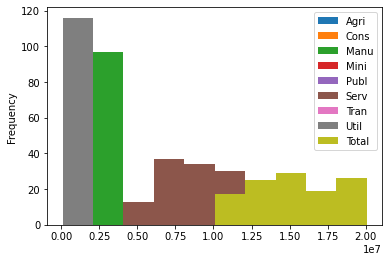

In [10]:
df.plot(kind='hist')

In [11]:
pd.concat([df.apply(lambda s:s/100),dfNZ,dfSW],ignore_index=True)

,Agri,Cons,Manu,Mini,Publ,Serv,Tran,Util,Total
0,3562.22154,9029.49,16896.45,9708.41,5702.55099,56069.05887,5665.58,937.38,1.075711e+05
1,3640.92188,8323.38,16653.91,9970.50,5675.17144,58261.91444,5761.05,978.89,1.092657e+05
2,3525.60802,9213.96,16530.18,10044.59,5645.83249,56536.99256,5841.34,1017.35,1.083559e+05
3,4060.12520,9575.77,17155.89,10337.07,5623.78212,57821.07893,5910.31,984.38,1.114684e+05
4,3495.32754,10383.50,16771.97,10025.65,5774.82016,57703.92699,5900.15,961.00,1.110163e+05
...,...,...,...,...,...,...,...,...,...
414,17044.00000,73138.00,160675.00,8315.00,232481.00000,585040.00000,41258.00,29216.00,1.147167e+06
415,17051.00000,73011.00,162187.00,8149.00,235533.00000,596631.00000,42622.00,30034.00,1.165218e+06
416,17330.00000,74335.00,161356.00,8009.00,236554.00000,604470.00000,43151.00,29577.00,1.174782e+06
417,17301.00000,74691.00,166519.00,7766.00,236460.00000,618406.00000,44439.00,30313.00,1.195895e+06


C:\Users\Andre\AppData\Local\Temp/ipykernel_7452/3401803521.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dfNZ.hist(ax=ax)


array([[<AxesSubplot:title={'center':'Agri'}>,
        <AxesSubplot:title={'center':'Cons'}>,
        <AxesSubplot:title={'center':'Manu'}>],
       [<AxesSubplot:title={'center':'Mini'}>,
        <AxesSubplot:title={'center':'Publ'}>,
        <AxesSubplot:title={'center':'Serv'}>],
       [<AxesSubplot:title={'center':'Tran'}>,
        <AxesSubplot:title={'center':'Util'}>,
        <AxesSubplot:title={'center':'Total'}>]], dtype=object)

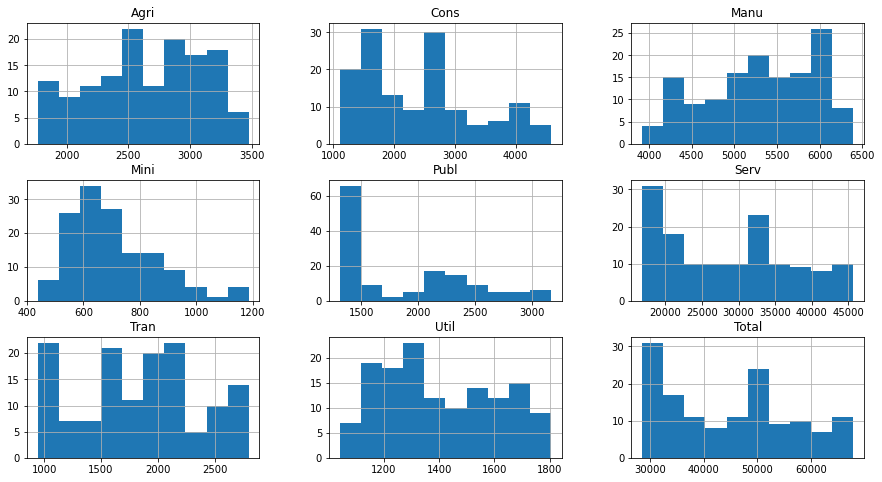

In [12]:
fig,ax=plt.subplots(1)
fig.set_size_inches(15,8)
dfNZ.hist(ax=ax)

### Mexico Regression
Regression Analysis of the impact of different sectors on service GDP


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

X=df.drop(columns=['Total','Serv']).apply(lambda x: x/1e4)
X=StandardScaler().fit(X).transform(X)
Y=df.Serv.apply(lambda x: x/1e4).values

train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.1,random_state=10)

regr=LinearRegression()
regr.fit(train_x,train_y)
test_y_hat=regr.predict(test_x)
train_y_hat=regr.predict(train_x)

ErrorTestPer=abs(test_y_hat-test_y)*100/test_y
ErrorTrainPer=abs(train_y_hat-train_y)*100/train_y

MSE=np.mean((test_y_hat-test_y)**2)
RMSE=np.sqrt(np.mean((test_y_hat-test_y)**2))

print("ErrorTest %",np.max(ErrorTestPer))
print("ErrorTrain %",np.max(ErrorTrainPer))
print("MSE",MSE)
print("RMSE",RMSE)
print("Score Test",regr.score(test_x,test_y))
print("Score Train",regr.score(train_x,train_y))
print("R2 Score",r2_score(test_y_hat,test_y))
print(np.std(train_x,axis=0))

ErrorTest % 3.0608827656332975
ErrorTrain % 4.641448617131569
MSE 165.22459582780962
RMSE 12.853971986425426
Score Test 0.9946939005259591
Score Train 0.9950155699846103
R2 Score 0.9946966703013618
[1.01191869 1.02622524 1.0094844  0.97515027 1.01002292 1.00563773
 1.01275731]


In [14]:
#df.reset_index().drop(columns=['DateTime','Serv','Total']).apply(lambda x: x/1e4)


### New Zealand Regression

In [15]:
### New Zealand Regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

X=dfNZ.drop(columns=['Total','Serv','Mini'])
X=StandardScaler().fit(X).transform(X)
Y=dfNZ['Serv'].values

train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.1,random_state=40)

regr=LinearRegression()
regr.fit(train_x,train_y)
test_y_hat=regr.predict(test_x)
train_y_hat=regr.predict(train_x)

ErrorTestPer=abs(test_y_hat-test_y)*100/test_y
ErrorTrainPer=abs(train_y_hat-train_y)*100/train_y

MSE=np.mean((test_y_hat-test_y)**2)
RMSE=np.sqrt(np.mean((test_y_hat-test_y)**2))

print("ErrorTest %",np.max(ErrorTestPer))
print("ErrorTrain %",np.max(ErrorTrainPer))
print("MSE",MSE)
print("RMSE",RMSE)
print("Score Test",regr.score(test_x,test_y))
print("Score Train",regr.score(train_x,train_y))


ErrorTest % 7.761737200041895
ErrorTrain % 8.039432189063469
MSE 856623.8770275728
RMSE 925.5397760375147
Score Test 0.9854761289901208
Score Train 0.9942255322829092


### Sweden Regression

In [16]:
### New Zealand Regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

X=dfSW.apply(lambda x: x/x.Total,axis=1).drop(columns=['Total','Serv'])
X=StandardScaler().fit(X).transform(X)
Y=dfSW['Serv'].values

train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.1,random_state=1)

regr=LinearRegression()
regr.fit(train_x,train_y)
test_y_hat=regr.predict(test_x)
train_y_hat=regr.predict(train_x)

ErrorTestPer=abs(test_y_hat-test_y)*100/test_y
ErrorTrainPer=abs(train_y_hat-train_y)*100/train_y

MSE=np.mean((test_y_hat-test_y)**2)
RMSE=np.sqrt(np.mean((test_y_hat-test_y)**2))

print("ErrorTest %",np.max(ErrorTestPer))
print("ErrorTrain %",np.max(ErrorTrainPer))
print("MSE",MSE)
print("RMSE",RMSE)
print("Score Test",regr.score(test_x,test_y))
print("Score Train",regr.score(train_x,train_y))


ErrorTest % 10.966321076841298
ErrorTrain % 11.918598125390377
MSE 317469261.91312253
RMSE 17817.667128811296
Score Test 0.9789730397014434
Score Train 0.9948026827082405


### Mexico+New Zealand Regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

X=pd.concat([df.apply(lambda x: x/100),dfNZ],
                      ignore_index=True).drop(columns=['Serv','Total','Mini'])
X=StandardScaler().fit(X).transform(X)
Y=pd.concat([df.apply(lambda x: x/100),dfNZ],ignore_index=True)['Serv'].values

train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.05,random_state=40)

regr=LinearRegression()
regr.fit(train_x,train_y)
test_y_hat=regr.predict(test_x)
train_y_hat=regr.predict(train_x)

ErrorTestPer=abs(test_y_hat-test_y)*100/test_y
ErrorTrainPer=abs(train_y_hat-train_y)*100/train_y

MSE=np.mean((test_y_hat-test_y)**2)
RMSE=np.sqrt(np.mean((test_y_hat-test_y)**2))

print("ErrorTest %",np.max(ErrorTestPer))
print("ErrorTrain %",np.max(ErrorTrainPer))
print("MSE",MSE)
print("RMSE",RMSE)
print("Score Test",regr.score(test_x,test_y))
print("Score Train",regr.score(train_x,train_y))


ErrorTest % 14.121861916035538
ErrorTrain % 14.985578063593909
MSE 4742056.70088415
RMSE 2177.6263914832016
Score Test 0.994460816239424
Score Train 0.9978166178606989


### Mexico + New Zealand Regression + Sweden

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

X=pd.concat([df.apply(lambda x: x/x.Total,axis=1),
             dfNZ.apply(lambda x: x/x.Total,axis=1),
             dfSW.apply(lambda x: x/x.Total,axis=1)],
                      ignore_index=True).drop(columns=['Serv','Total','Mini'])
X=StandardScaler().fit(X).transform(X)
Y=pd.concat([df.apply(lambda x: x/x.Total,axis=1),
             dfNZ.apply(lambda x: x/x.Total,axis=1),
             dfSW.apply(lambda x: x/x.Total,axis=1)],
            ignore_index=True)['Serv'].values

train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.1,random_state=40)

regr=LinearRegression()
regr.fit(train_x,train_y)
test_y_hat=regr.predict(test_x)
train_y_hat=regr.predict(train_x)

ErrorTestPer=abs(test_y_hat-test_y)*100/test_y
ErrorTrainPer=abs(train_y_hat-train_y)*100/train_y

MSE=np.mean((test_y_hat-test_y)**2)
RMSE=np.sqrt(np.mean((test_y_hat-test_y)**2))

print("ErrorTest %",np.max(ErrorTestPer))
print("ErrorTrain %",np.max(ErrorTrainPer))
print("MSE",MSE)
print("RMSE",RMSE)
print("Score Test",regr.score(test_x,test_y))
print("Score Train",regr.score(train_x,train_y))

ErrorTest % 6.766652662644124
ErrorTrain % 5.899545807837007
MSE 0.00011145607225723057
RMSE 0.010557275797156696
Score Test 0.9893897295594559
Score Train 0.9913778934106801


In [19]:
"""formatt=lambda x:"{:.2f}%".format(x)
dfMxPerc=df.merge(df.apply(lambda s:s*100/s.Total,axis=1)
                  .apply(lambda s:s*100/s.Total,axis=1)#.applymap(formatt)
                  .drop(columns=['Total'])
                  ,left_index=True,right_index=True,suffixes=('','%'))
dfMxPerc=dfMxPerc[sorted(dfMxPerc.columns)].drop(columns=['Total'])
"""

dfMxPerc=df.apply(lambda s:s*100/s.Total,axis=1).drop(columns=['Total'])
dfMxPerc

,Agri,Cons,Manu,Mini,Publ,Serv,Tran,Util
DateTime,,,,,,,,
1993-03-31T00:00:00,3.311503,8.393971,15.707233,9.025106,5.301190,52.122770,5.266821,0.871405
1993-06-30T00:00:00,3.332172,7.617557,15.241658,9.125001,5.193917,53.321302,5.272513,0.895880
1993-09-30T00:00:00,3.253731,8.503426,15.255456,9.270002,5.210455,52.177147,5.390886,0.938897
1993-12-31T00:00:00,3.642400,8.590569,15.390809,9.273542,5.045180,51.872168,5.302229,0.883102
1994-03-31T00:00:00,3.148480,9.353127,15.107658,9.030787,5.201775,51.977866,5.314668,0.865638
...,...,...,...,...,...,...,...,...
2020-12-31T00:00:00,3.689256,5.611249,15.061388,4.409078,3.802544,60.589910,5.415813,1.420763
2021-03-31T00:00:00,3.123840,6.049277,15.490760,4.812901,3.912336,59.827268,5.443259,1.340357
2021-06-30T00:00:00,3.267774,5.612434,15.056448,4.475086,3.930564,60.338123,5.899435,1.420136


In [20]:
"""
formatt=lambda x:"{:.2f}%".format(x)
dfSWPerc=dfSW.merge(dfSW.apply(lambda s:s*100/s.Total,axis=1)
                  .apply(lambda s:s*100/s.Total,axis=1)#.applymap(formatt)
                  .drop(columns=['Total'])
                  ,left_index=True,right_index=True,suffixes=('','%'))
dfSWPerc[sorted(dfSWPerc.columns)].drop(columns=['Total'])
"""
dfSWPerc=dfSW.apply(lambda s:s*100/s.Total,axis=1).drop(columns=['Total'])
dfSWPerc      

,Agri,Cons,Manu,Mini,Publ,Serv,Tran,Util
DateTime,,,,,,,,
1981-03-31T00:00:00,1.941893,7.793446,10.770063,2.179813,35.085796,34.331691,4.982920,2.914378
1981-06-30T00:00:00,2.001321,7.853115,11.023423,1.937060,35.134950,34.261820,4.864581,2.923731
1981-09-30T00:00:00,1.963679,7.889617,11.179120,1.715803,34.961977,34.316605,4.804142,3.169055
1981-12-31T00:00:00,1.916242,7.962464,11.311853,1.636857,35.130744,34.277527,4.764782,2.999530
1982-03-31T00:00:00,2.049320,8.081901,11.055327,1.442240,35.127069,34.613578,4.823064,2.807501
...,...,...,...,...,...,...,...,...
2020-12-31T00:00:00,1.485747,6.375532,14.006243,0.724829,20.265663,50.998678,3.596512,2.546796
2021-03-31T00:00:00,1.463331,6.265866,13.919026,0.699354,20.213642,51.203380,3.657856,2.577543
2021-06-30T00:00:00,1.475167,6.327557,13.734974,0.681744,20.135991,51.453802,3.673107,2.517659


In [21]:
"""
formatt=lambda x:"{:.2f}%".format(x)
dfNZPerc=dfNZ.merge(dfNZ.apply(lambda s:s*100/s.Total,axis=1)
                  .apply(lambda s:s*100/s.Total,axis=1)#.applymap(formatt)
                  .drop(columns=['Total'])
                  ,left_index=True,right_index=True,suffixes=('','%'))
dfNZPerc[sorted(dfNZPerc.columns)].drop(columns=['Total'])
"""

dfNZPerc=dfNZ.apply(lambda s:s*100/s.Total,axis=1).drop(columns=['Total'])                 
dfNZPerc

,Agri,Cons,Manu,Mini,Publ,Serv,Tran,Util
DateTime,,,,,,,,
1987-06-30T00:00:00,6.396744,5.443668,15.777940,1.864413,4.796689,58.527253,3.273157,3.920136
1987-09-30T00:00:00,6.591540,5.662275,15.367545,1.567268,4.771151,58.814147,3.370319,3.855756
1987-12-31T00:00:00,6.895841,5.635496,15.010818,2.221917,4.715134,58.209417,3.485697,3.825681
1988-03-31T00:00:00,6.865968,5.687967,14.975002,2.277241,4.705157,58.078214,3.564824,3.845627
1988-06-30T00:00:00,6.847381,5.297420,15.265388,2.149278,4.729101,58.323287,3.644129,3.744015
...,...,...,...,...,...,...,...,...
2020-12-31T00:00:00,4.997585,6.412114,9.639981,0.986120,4.742098,67.269555,3.223193,2.729355
2021-03-31T00:00:00,4.962284,6.684488,9.664931,0.970948,4.734910,67.296554,3.071085,2.614801
2021-06-30T00:00:00,5.129075,6.583567,9.436495,0.967694,4.541968,67.014309,3.811772,2.515120


<AxesSubplot:>

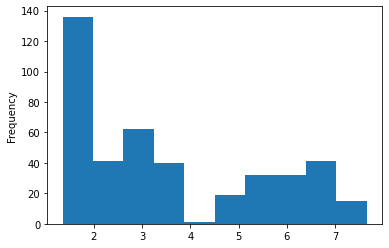

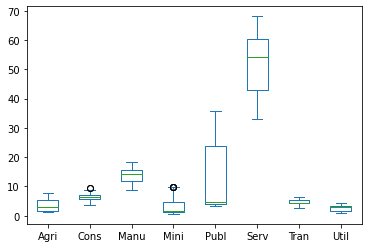

In [22]:
perctDf=pd.concat([dfMxPerc,dfNZPerc,dfSWPerc], ignore_index=True)
describe=perctDf.describe()
ax=perctDf.Agri.plot(kind='hist')
perctDf.plot(kind='box')

In [23]:
stdVal=describe.values[2]
meanVal=describe.values[1]
print(stdVal)
print(meanVal)

[ 1.95537637  1.0655518   2.24674462  2.8956734  11.78713212 10.29983082
  0.75729632  0.97354143]
[ 3.56295087  6.33661832 13.91746762  3.10337751 13.2369588  52.44626599
  4.73278087  2.66358003]


In [24]:
describe

,Agri,Cons,Manu,Mini,Publ,Serv,Tran,Util
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
mean,3.562951,6.336618,13.917468,3.103378,13.236959,52.446266,4.732781,2.663580
std,1.955376,1.065552,2.246745,2.895673,11.787132,10.299831,0.757296,0.973541
min,1.355225,3.810009,8.793088,0.623063,3.371452,33.164106,2.806709,0.865638
25%,1.729596,5.606847,11.894274,1.244544,4.015600,42.952903,4.223882,1.518625
50%,3.057034,6.324054,14.418328,1.655848,4.684085,54.238767,4.459197,2.929410
75%,5.510315,7.052240,15.488723,4.616323,23.696992,60.291022,5.391852,3.317328
max,7.657531,9.485409,18.276250,9.749862,35.732736,68.118029,6.238633,4.263830


$$Pib_{Total}=Pib_{Agri} + Pib_{Cons}+... + Pib_{Tran}+ Pib_{Util}$$

Being $$S(x)=\frac{(x-\mu_x)}{\sigma_{x}^2}$$ and $$w=[w_1,w_2,...,w_8] \ and  \ X = [Pib_{Agri(nx1)},Pib_{Cons(nx1)}, ..., Pib_{Util(nx1)} ]$$

$$ Y = Xw^T=Pib_{Agri}w_1 +  ...+ Pib_{Util}w_8$$ 

$$ Y_s = S(X)w^T=S(Pib_{Agri})w_1 + ...+ S(Pib_{Util} )w_8$$ 

$$ Y_s = S(X)w^T=\frac{(Pib_{Agri}-\mu_{Pib_{Agri}})}{\sigma_{Pib_{Agri}}^2}w_1 +  ...+\frac{(Pib_{Util}-\mu_{Pib_{Util}})}{\sigma_{Pib_{Util}}^2} w_8$$ 

$$ Y_s = S(X)w^T=\frac{Pib_{Agri}}{\sigma_{Pib_{Agri}}^2}w_1 +  ...+ \frac{Pib_{Util}}{\sigma_{Pib_{Util}}^2} w_8 + 
[\frac{(-\mu_{Pib_{Agri}})}{\sigma_{Pib_{Agri}}^2}w_1 +  ...+ \frac{(-\mu_{Pib_{Util}})}{\sigma_{Pib_{Util}}^2}]w_8$$ 



$$  w=(S(X^T)S(X))^{-1}S(X)^TY_s=(Corr_{Pib_{x}Pib_{x}})^{-1}S(X)^TY=(Corr_{Pib_{x}Pib_{x}})^{-1}Corr_{Pib_{x}Pib_{y}}$$ 

$$  Pib_{Total} = w_1S(Pib_{Agri}) + w_2S(Pib_{Cons})+ ...+ w_8S(Pib_{Util} )$$ 

$$  Pib_{Total} = w_1S(KPib_{Agri}) + w_2S(KPib_{Cons})+ ...+ w_8S(KPib_{Util} ), where \ K=\frac{1}{Pib_{Total}} \ and $$ 

$$S(\frac{x}{Pib_{Total}})=\frac{(\frac{x}{Pib_{Total}}-\frac{\mu_x}{Pib_{Total}})}{\sigma^2}=
 \frac{(x-\mu_x)}{\sigma^2}\frac{1}{Pib_{Total}}$$
 
 $$ Pib_{Total} =\frac{1}{Pib_{Total}} [w_1S(Pib_{Agri}) + w_2S(Pib_{Cons})+ ...+ w_8S(Pib_{Util} )] $$
 
$$  Pib_{Total} = w_1K_2Pib2_{Agri} + w_2K_2Pib2_{Cons}+ ...+ w_8K_2Pib2_{Util} $$ being $$K_2=\frac{1}{Pib_{Total2}}$$ 

 


$$Pib_{Total}=Pib_{Agri} + Pib_{Cons}+ Pib_{Manu}+Pib_{Mini} + Pib_{Publ}+ Pib_{Serv} + Pib_{Tran}+ Pib_{Util}$$
$$ Y = w_1Pib_{Agri} + w_2Pib_{Cons}+ w_3Pib_{Manu}+w_4Pib_{Mini} + w_5Pib_{Publ}+ w_6Pib_{Serv} + w_7Pib_{Tran}+ w_8Pib_{Util} $$ 

$$  Pib_{Total} = K*w_1Pib_{Agri} + K*w_2Pib_{Cons}+ K*w_3Pib_{Manu}+K*w_4Pib_{Mini} + K*w_5Pib_{Publ}+ K*w_6Pib_{Serv} + K*w_7Pib_{Tran}+ K*w_8Pib_{Util} $$ being $$K=\frac{1}{Pib_{Total}}$$ 

\frac{1}{Pib_{Total}}\frac{Pib_{Total}}{8}